In [1]:
#importing necessary libraries for linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#reading the car-pricing-data table as df
df = pd.read_csv("./car-pricing-data.csv")

In [3]:
#cheking out the data at a first glance
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

   seats  
0    5.0  
1    5.0  
2    5.0  
3    5.0  
4    5.0

In [4]:
#information about the number of columns (features) and rows (instances)
df.shape

(8128, 12)

In [5]:
#cheking which features we've got
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [6]:
#See that how many features and it's data types of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [7]:
#checking the rows if there any missing information 
df.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [8]:
#dropping the rows with any missing information
df.dropna(inplace=True)

In [9]:
#check that we have no rows with missing information
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [10]:
#removing unit names from the values
df['mileage'] = df['mileage'].str.replace(" kmpl","")
df['mileage'] = df['mileage'].str.replace(" km/kg","")
df['engine'] = df['engine'].str.replace(" CC","")
df['max_power'] = df['max_power'].str.replace(" bhp", "")

df = df.drop(df[df['max_power']== ''].index.values)

#adding the unit to the name of the feature
df = df.rename(columns = {"max_power":"max_power_bhp"})
df = df.rename(columns = {"engine":"engine_CC"})
df = df.rename(columns = {"mileage":"mileage_kmpl"}) 

In [11]:
#changing data type from string to float in order to make it ready for processing
df['mileage_kmpl'] = df['mileage_kmpl'].astype(float)

df['engine_CC'] = df['engine_CC'].astype(float)

df['max_power_bhp'] = df['max_power_bhp'].astype(float)

In [12]:
#deleting rows with 0 values except km_driven
for col in df.columns:
    if col == 'km_driven':
        pass
    else:
        df = df[df[col] != 0]


In [13]:
#converting year to age
df["year"] = [2020 - x for x in df["year"]]

#changing the name of the year column
df = df.rename(columns = {"year":"age"}) 

In [14]:
#Check if data types are correctly converted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7889 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7889 non-null   object 
 1   age            7889 non-null   int64  
 2   selling_price  7889 non-null   int64  
 3   km_driven      7889 non-null   int64  
 4   fuel           7889 non-null   object 
 5   seller_type    7889 non-null   object 
 6   transmission   7889 non-null   object 
 7   owner          7889 non-null   object 
 8   mileage_kmpl   7889 non-null   float64
 9   engine_CC      7889 non-null   float64
 10  max_power_bhp  7889 non-null   float64
 11  seats          7889 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 801.2+ KB


In [15]:
#basic stastistical information of our corrected data
df.describe()

age  selling_price     km_driven  mileage_kmpl    engine_CC  \
count  7889.000000   7.889000e+03  7.889000e+03   7889.000000  7889.000000   
mean      6.012169   6.496753e+05  6.919859e+04     19.461709  1458.378628   
std       3.863460   8.134766e+05  5.682769e+04      3.938527   503.299977   
min       0.000000   2.999900e+04  1.000000e+00      9.000000   624.000000   
25%       3.000000   2.700000e+05  3.500000e+04     16.780000  1197.000000   
50%       5.000000   4.500000e+05  6.000000e+04     19.330000  1248.000000   
75%       8.000000   6.900000e+05  9.550000e+04     22.320000  1582.000000   
max      26.000000   1.000000e+07  2.360457e+06     42.000000  3604.000000   

       max_power_bhp        seats  
count    7889.000000  7889.000000  
mean       91.588665     5.418050  
std        35.731275     0.958526  
min        32.800000     4.000000  
25%        68.050000     5.000000  
50%        82.000000     5.000000  
75%       102.000000     5.000000  
max       400.000000    14.000000

In [16]:
# Find the correlation between selling price and other features
df.corrwith(df['selling_price'])

age             -0.412429
selling_price    1.000000
km_driven       -0.222696
mileage_kmpl    -0.128868
engine_CC        0.455077
max_power_bhp    0.749194
seats            0.041865
dtype: float64

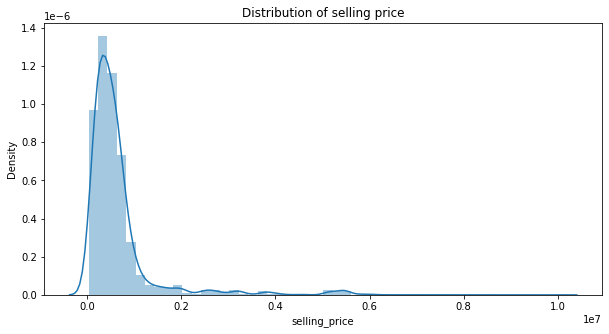

In [17]:
#distribution of selling price plot with seaborn library
plt.figure(figsize=(10,5))

sns.distplot(df["selling_price"])
plt.title("Distribution of selling price")
plt.show()

Text(0.5, 1.0, 'Age vs Selling Price')

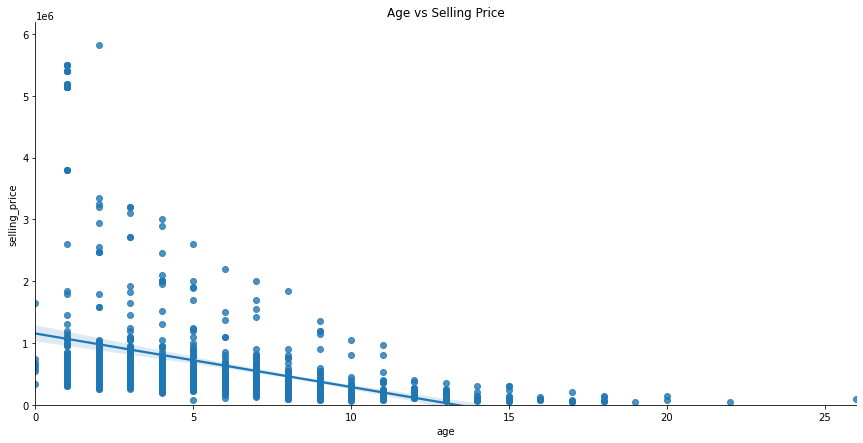

In [18]:
#age vs selling price plot
sample = df.sample(n = 1000)
sns.lmplot('age', 'selling_price', data=sample[['selling_price','age']],height = 6, aspect = 2)
plt.ylim(0, None)
plt.xlim(sample["age"].min(),sample["age"].max())
plt.title('Age vs Selling Price')

Text(0.5, 1.0, 'Max Power vs Selling Price')

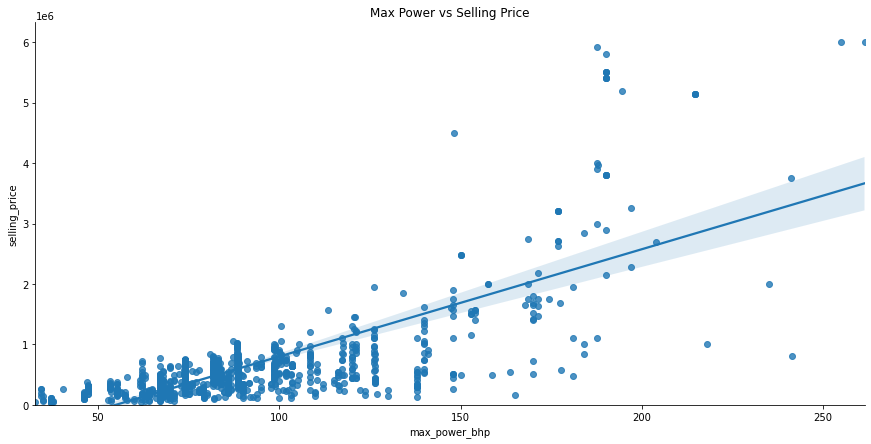

In [19]:
#max power vs selling price plot
sample = df.sample(n = 1000)
sns.lmplot('max_power_bhp', 'selling_price', data=sample[['selling_price','max_power_bhp']],height = 6, aspect =2)
plt.ylim(0, None)
plt.xlim(sample["max_power_bhp"].min(),sample["max_power_bhp"].max())
plt.title('Max Power vs Selling Price')

Text(0.5, 1.0, 'Engine Capacity vs Selling Price')

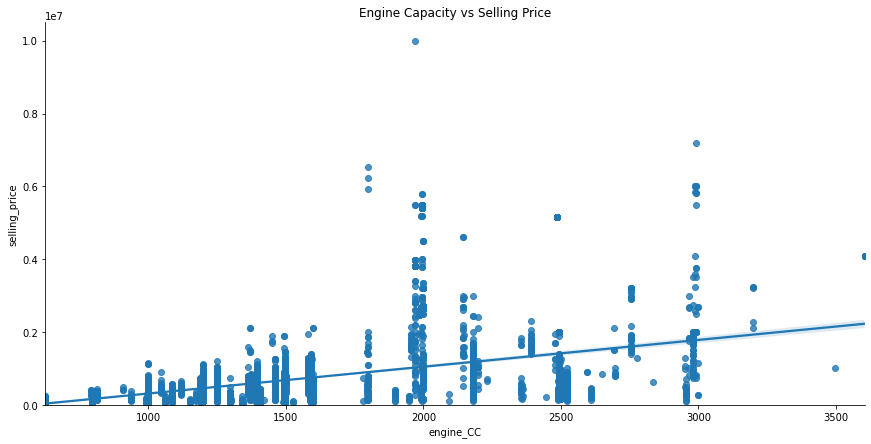

In [20]:
#engine capacity vs selling price plot
sns.lmplot('engine_CC', 'selling_price', data=df[['selling_price','engine_CC']],height = 6, aspect = 2)
plt.ylim(0, None)
plt.xlim(df["engine_CC"].min(),df["engine_CC"].max())
plt.title('Engine Capacity vs Selling Price')

Text(0.5, 1.0, 'Mileage vs Selling Price')

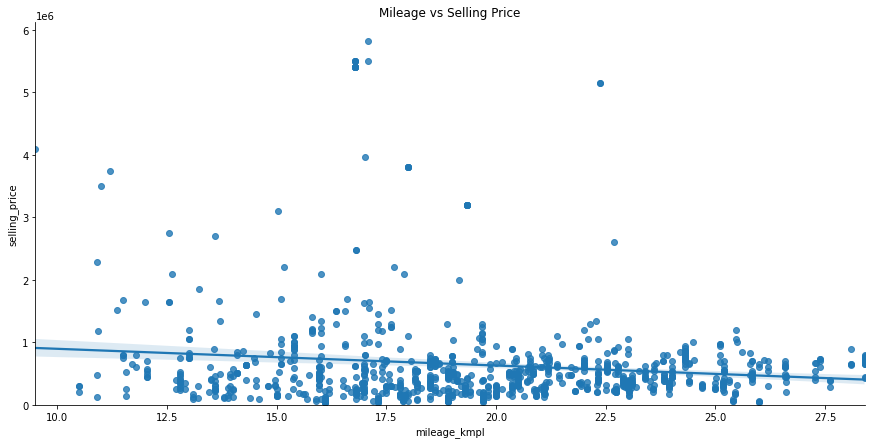

In [21]:
#mileage vs selling price plot
sample = df.sample(n = 1000)
sns.lmplot('mileage_kmpl', 'selling_price', data=sample[['selling_price','mileage_kmpl']],height = 6, aspect = 2)
plt.ylim(0, None)
plt.xlim(sample["mileage_kmpl"].min(),sample["mileage_kmpl"].max())
plt.title('Mileage vs Selling Price')

Text(0.5, 1.0, 'Km Driven vs Selling Price')

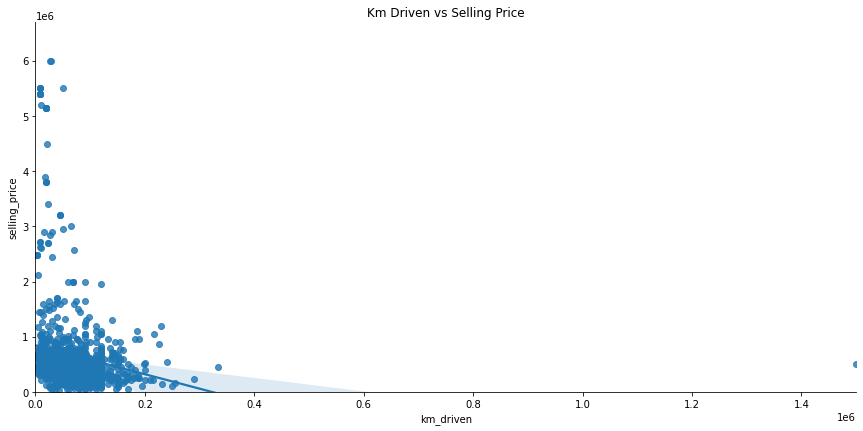

In [22]:
#km driven vs selling price plot
sample = df.sample(n = 1000)
sns.lmplot('km_driven', 'selling_price', data=sample[['selling_price','km_driven']],height = 6, aspect = 2)
plt.ylim(0, None)
plt.xlim(0,sample["km_driven"].max())
plt.title('Km Driven vs Selling Price')

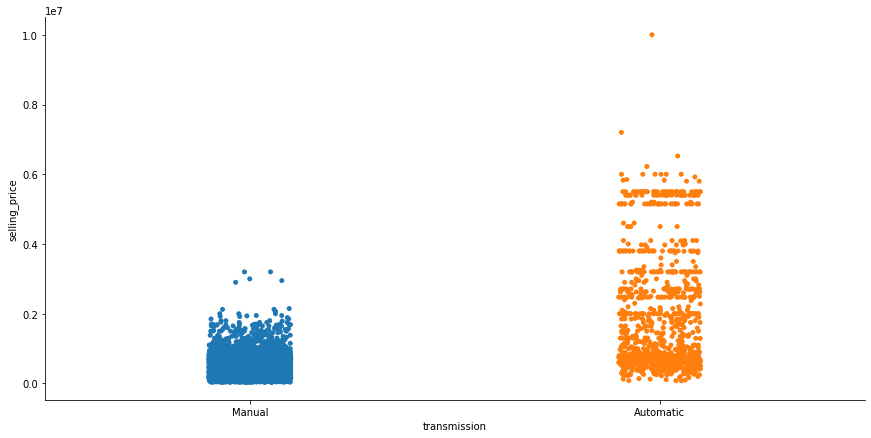

In [23]:
#transmission distribution
sns.catplot(x=df['transmission'], y=df['selling_price'], data=df, height=6, aspect=2)

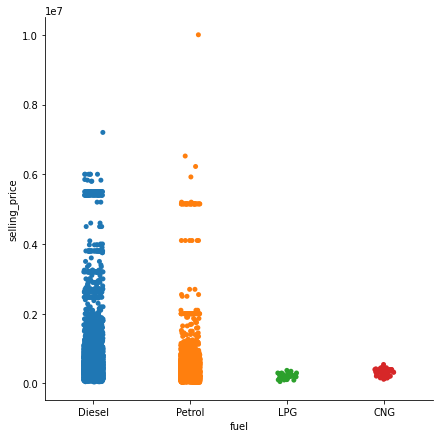

In [24]:
#fuel type distribution
sns.catplot(x=df['fuel'], y=df['selling_price'], data=df, height=6, aspect=1)

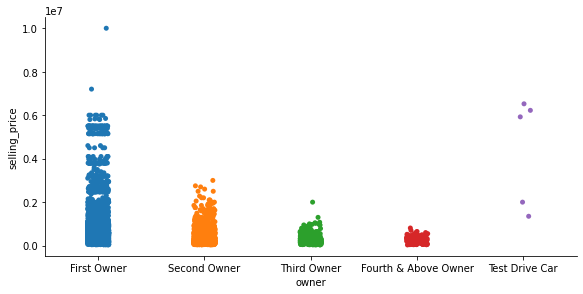

In [25]:
#owner distribution
sns.catplot(x=df['owner'], y=df['selling_price'], data=df, height=4, aspect=2)

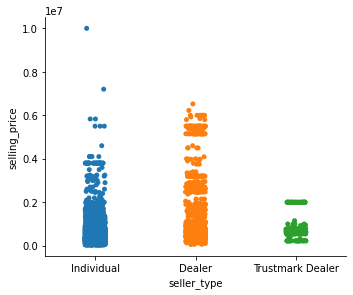

In [26]:
#seller type distribution
sns.catplot(x=df['seller_type'], y=df['selling_price'], data=df, height=4, aspect=1.2)

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

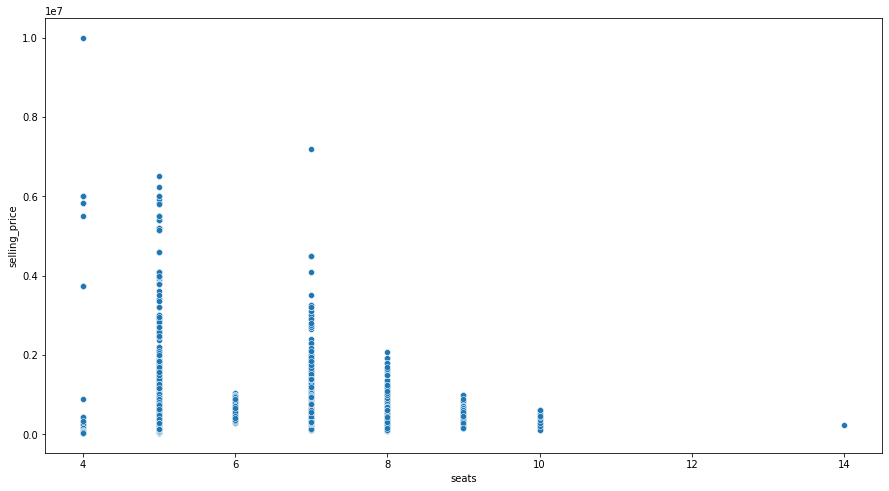

In [27]:
#seats plot
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['seats'], y=df['selling_price'])

In [28]:
#find correlation between datas after preproccessing
#and before dummying values
df.corrwith(df['selling_price'])


age             -0.412429
selling_price    1.000000
km_driven       -0.222696
mileage_kmpl    -0.128868
engine_CC        0.455077
max_power_bhp    0.749194
seats            0.041865
dtype: float64

In [29]:
#changing categorical features into dummy format
df = pd.get_dummies(df, columns = ['fuel', 'seller_type', 'transmission', 'owner'])
df

name  age  selling_price  km_driven  \
0           Maruti Swift Dzire VDI    6         450000     145500   
1     Skoda Rapid 1.5 TDI Ambition    6         370000     120000   
2         Honda City 2017-2020 EXi   14         158000     140000   
3        Hyundai i20 Sportz Diesel   10         225000     127000   
4           Maruti Swift VXI BSIII   13         130000     120000   
...                            ...  ...            ...        ...   
8123             Hyundai i20 Magna    7         320000     110000   
8124         Hyundai Verna CRDi SX   13         135000     119000   
8125        Maruti Swift Dzire ZDi   11         382000     120000   
8126               Tata Indigo CR4    7         290000      25000   
8127               Tata Indigo CR4    7         290000      25000   

      mileage_kmpl  engine_CC  max_power_bhp  seats  fuel_CNG  fuel_Diesel  \
0            23.40     1248.0          74.00    5.0         0            1   
1            21.14     1498.0         103.52    5.0         0            1   
2            17.70     1497.0          78.00    5.0         0            0   
3            23.00     1396.0          90.00    5.0         0            1   
4            16.10     1298.0          88.20    5.0         0            0   
...            ...        ...            ...    ...       ...          ...   
8123         18.50     1197.0          82.85    5.0         0            0   
8124         16.80     1493.0         110.00    5.0         0            1   
8125         19.30     1248.0          73.90    5.0         0            1   
8126         23.57     1396.0          70.00    5.0         0            1   
8127         23.57     1396.0          70.00    5.0         0            1   

      ...  seller_type_Dealer  seller_type_Individual  \
0     ...                   0                       1   
1     ...                   0                       1   
2     ...                   0                       1   
3     ...                   0                       1   
4     ...                   0                       1   
...   ...                 ...                     ...   
8123  ...                   0                       1   
8124  ...                   0                       1   
8125  ...                   0                       1   
8126  ...                   0                       1   
8127  ...                   0                       1   

      seller_type_Trustmark Dealer  transmission_Automatic  \
0                                0                       0   
1                                0                       0   
2                                0                       0   
3                                0                       0   
4                                0                       0   
...                            ...                     ...   
8123                             0                       0   
8124                             0                       0   
8125                             0                       0   
8126                             0                       0   
8127                             0                       0   

      transmission_Manual  owner_First Owner  owner_Fourth & Above Owner  \
0                       1                  1                           0   
1                       1                  0                           0   
2                       1                  0                           0   
3                       1                  1                           0   
4                       1                  1                           0   
...                   ...                ...                         ...   
8123                    1                  1                           0   
8124                    1                  0                           1   
8125                    1                  1                           0   
8126                    1                  1                           0  

In [30]:
#correlation with selling price
df.corrwith(df['selling_price'])


age                            -0.412429
selling_price                   1.000000
km_driven                      -0.222696
mileage_kmpl                   -0.128868
engine_CC                       0.455077
max_power_bhp                   0.749194
seats                           0.041865
fuel_CNG                       -0.033224
fuel_Diesel                     0.203669
fuel_LPG                       -0.036010
fuel_Petrol                    -0.193894
seller_type_Dealer              0.401465
seller_type_Individual         -0.385786
seller_type_Trustmark Dealer    0.032850
transmission_Automatic          0.590011
transmission_Manual            -0.590011
owner_First Owner               0.240130
owner_Fourth & Above Owner     -0.073339
owner_Second Owner             -0.178325
owner_Test Drive Car            0.116226
owner_Third Owner              -0.116761
dtype: float64

In [31]:
#describing the data with many useful datas
pd.set_option('display.max_columns', None)

df.describe(percentiles=[0.5])

##end-of-preproccessing

age  selling_price     km_driven  mileage_kmpl    engine_CC  \
count  7889.000000   7.889000e+03  7.889000e+03   7889.000000  7889.000000   
mean      6.012169   6.496753e+05  6.919859e+04     19.461709  1458.378628   
std       3.863460   8.134766e+05  5.682769e+04      3.938527   503.299977   
min       0.000000   2.999900e+04  1.000000e+00      9.000000   624.000000   
50%       5.000000   4.500000e+05  6.000000e+04     19.330000  1248.000000   
max      26.000000   1.000000e+07  2.360457e+06     42.000000  3604.000000   

       max_power_bhp        seats     fuel_CNG  fuel_Diesel     fuel_LPG  \
count    7889.000000  7889.000000  7889.000000  7889.000000  7889.000000   
mean       91.588665     5.418050     0.006591     0.544175     0.004437   
std        35.731275     0.958526     0.080925     0.498076     0.066464   
min        32.800000     4.000000     0.000000     0.000000     0.000000   
50%        82.000000     5.000000     0.000000     1.000000     0.000000   
max       400.000000    14.000000     1.000000     1.000000     1.000000   

       fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
count  7889.000000         7889.000000             7889.000000   
mean      0.444797            0.139815                0.830270   
std       0.496975            0.346817                0.375419   
min       0.000000            0.000000                0.000000   
50%       0.000000            0.000000                1.000000   
max       1.000000            1.000000                1.000000   

       seller_type_Trustmark Dealer  transmission_Automatic  \
count                   7889.000000             7889.000000   
mean                       0.029915                0.131195   
std                        0.170364                0.337635   
min                        0.000000                0.000000   
50%                        0.000000                0.000000   
max                        1.000000                1.000000   

       transmission_Manual  owner_First Owner  owner_Fourth & Above Owner  \
count          7889.000000        7889.000000                 7889.000000   
mean              0.868805           0.659779                    0.020155   
std               0.337635           0.473813                    0.140538   
min               0.000000           0.000000                    0.000000   
50%               1.000000           1.000000                    0.000000   
max               1.000000           1.000000                    1.000000   

       owner_Second Owner  owner_Test Drive Car  owner_Third Owner  
count         7889.000000           7889.000000        7889.000000  
mean             0.255039              0.000634           0.064393  
std              0.435911              0.025169           0.245468  
min              0.000000              0.000000           0.000000  
50%              0.000000              0.000000           0.000000  
max              1.000000              1.000000           1.000000

In [32]:
#starting linear regression
#check for non-numerical values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7889 entries, 0 to 8127
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          7889 non-null   object 
 1   age                           7889 non-null   int64  
 2   selling_price                 7889 non-null   int64  
 3   km_driven                     7889 non-null   int64  
 4   mileage_kmpl                  7889 non-null   float64
 5   engine_CC                     7889 non-null   float64
 6   max_power_bhp                 7889 non-null   float64
 7   seats                         7889 non-null   float64
 8   fuel_CNG                      7889 non-null   uint8  
 9   fuel_Diesel                   7889 non-null   uint8  
 10  fuel_LPG                      7889 non-null   uint8  
 11  fuel_Petrol                   7889 non-null   uint8  
 12  seller_type_Dealer            7889 non-null   uint8  
 13  sel

In [33]:
#we need to get rid of all non-numeric data type
df.drop(['name'], axis=1, inplace=True)

In [34]:
############    1st FEATURE SET START     ############

x = df.loc[:,['max_power_bhp', 'engine_CC', 'km_driven', 'age']].values
y = df.loc[:,['selling_price']].values


In [35]:
# Split the data to training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 147)

# Print the number of instances in training & test set
print(x_train.shape)
print(x_test.shape)
x_test

(6311, 4)
(1578, 4)


array([[7.000e+01, 1.120e+03, 9.000e+04, 4.000e+00],
       [4.630e+01, 7.960e+02, 7.000e+04, 1.300e+01],
       [7.397e+01, 1.186e+03, 5.000e+04, 2.000e+00],
       ...,
       [1.006e+02, 2.494e+03, 9.000e+04, 5.000e+00],
       [1.085e+02, 1.461e+03, 3.600e+04, 4.000e+00],
       [1.200e+02, 2.179e+03, 1.200e+05, 4.000e+00]])

In [36]:
# Initialize min-max scaler and transform each feature by using min-max scaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_train

array([[0.03676471, 0.05771812, 0.04702439, 0.30769231],
       [0.23747277, 0.66610738, 0.04660074, 0.46153846],
       [0.09327342, 0.12550336, 0.00423605, 0.11538462],
       ...,
       [0.17728758, 0.29328859, 0.04363521, 0.11538462],
       [0.09068627, 0.12550336, 0.02118192, 0.38461538],
       [0.23747277, 0.52181208, 0.0381278 , 0.30769231]])

In [37]:
model = LinearRegression()
# Fit the training data to the model
model.fit(x_train, y_train)
model.coef_


array([[ 6122821.63062301,  -214879.65530444, -3022217.20319679,
        -1143317.70125992]])

In [38]:
# Print the general formula of our linear regression model
_str_1 = "y = "
for i, m in enumerate(model.coef_):
    _str_1 += "x_{}*{}+".format(i+1, m)
_str_1 += str(model.intercept_)
print(_str_1)

y = x_1*[ 6122821.63062301  -214879.65530444 -3022217.20319679 -1143317.70125992]+[82386.50893234]


In [39]:
# Scale each feature to range(0, 1)
x_test = scaler.transform(x_test)
x_test

array([[0.10130719, 0.16644295, 0.0381278 , 0.15384615],
       [0.03676471, 0.05771812, 0.02965486, 0.5       ],
       [0.11211874, 0.1885906 , 0.02118192, 0.07692308],
       ...,
       [0.18464052, 0.62751678, 0.0381278 , 0.19230769],
       [0.20615468, 0.28087248, 0.01525087, 0.15384615],
       [0.23747277, 0.52181208, 0.05083721, 0.15384615]])

In [40]:
# Predict the values by using all test data
y_pred = model.predict(x_test)

# Print the predicted and the actual value of the first row in test set
"Predicted: {}, Actual: {}".format(y_pred[1], y_test[1])

'Predicted: [-366194.49319759], Actual: [100000]'

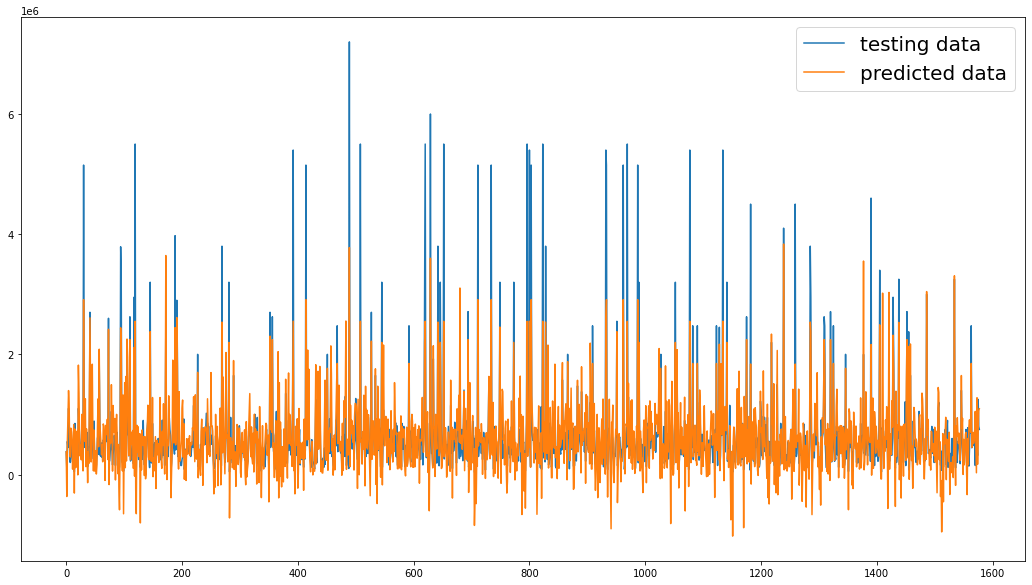

In [41]:
plt.figure(figsize=(18,10))

plt.plot(y_test, label="testing data")
plt.plot(y_pred, label="predicted data")


plt.legend(prop={"size":20})
plt.show()

In [42]:
# Calculate mean squared error of predicted values
mse_1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error : ", mse_1)
# Calculate absolute squared error of predicted values
mae_1 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae_1)
# Calculate root mean squared error
rms_1 = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", rms_1)
# Calculate the R_2 score
r2_1 = r2_score(y_test, y_pred)
print("R_2 Score : ", r2_1)

Mean Squared Error :  238888853880.32742
Mean Absolute Error :  292521.00019099214
Root Mean Squared Error :  488762.5741403769
R_2 Score :  0.6328316279270444


In [43]:
############    1st FEATURE SET FINISHED     ############

In [44]:
############    2nd FEATURE SET START     ############

x = df.loc[:,['max_power_bhp', 'engine_CC', 'km_driven', 'age', 'transmission_Automatic', 'transmission_Manual']].values
y = df.loc[:,['selling_price']].values

# Split the data to training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 147)
# Print the number of instances in training & test set
print(x_train.shape)
print(x_test.shape)
x_test

(6311, 6)
(1578, 6)


array([[7.000e+01, 1.120e+03, 9.000e+04, 4.000e+00, 0.000e+00, 1.000e+00],
       [4.630e+01, 7.960e+02, 7.000e+04, 1.300e+01, 0.000e+00, 1.000e+00],
       [7.397e+01, 1.186e+03, 5.000e+04, 2.000e+00, 0.000e+00, 1.000e+00],
       ...,
       [1.006e+02, 2.494e+03, 9.000e+04, 5.000e+00, 0.000e+00, 1.000e+00],
       [1.085e+02, 1.461e+03, 3.600e+04, 4.000e+00, 0.000e+00, 1.000e+00],
       [1.200e+02, 2.179e+03, 1.200e+05, 4.000e+00, 0.000e+00, 1.000e+00]])

In [45]:
# Initialize min-max scaler and transform each feature by using min-max scaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_train

array([[0.03676471, 0.05771812, 0.04702439, 0.30769231, 0.        ,
        1.        ],
       [0.23747277, 0.66610738, 0.04660074, 0.46153846, 0.        ,
        1.        ],
       [0.09327342, 0.12550336, 0.00423605, 0.11538462, 0.        ,
        1.        ],
       ...,
       [0.17728758, 0.29328859, 0.04363521, 0.11538462, 0.        ,
        1.        ],
       [0.09068627, 0.12550336, 0.02118192, 0.38461538, 0.        ,
        1.        ],
       [0.23747277, 0.52181208, 0.0381278 , 0.30769231, 0.        ,
        1.        ]])

In [46]:
model = LinearRegression()
# Fit the training data to the model
model.fit(x_train, y_train)
model.coef_

array([[ 5.27189236e+06, -1.08257698e+05, -2.30950490e+06,
        -1.07206957e+06,  5.05679782e+19,  5.05679782e+19]])

In [47]:
# Print the general formula of our linear regression model
_str_2 = "y = "
for i, m in enumerate(model.coef_):
    _str_2 += "x_{}*{}+".format(i+1, m)
_str_2 += str(model.intercept_)
print(_str_2)

y = x_1*[ 5.27189236e+06 -1.08257698e+05 -2.30950490e+06 -1.07206957e+06
  5.05679782e+19  5.05679782e+19]+[-5.05679782e+19]


In [48]:
# Scale each feature to range(0, 1)
x_test = scaler.transform(x_test)
x_test

array([[0.10130719, 0.16644295, 0.0381278 , 0.15384615, 0.        ,
        1.        ],
       [0.03676471, 0.05771812, 0.02965486, 0.5       , 0.        ,
        1.        ],
       [0.11211874, 0.1885906 , 0.02118192, 0.07692308, 0.        ,
        1.        ],
       ...,
       [0.18464052, 0.62751678, 0.0381278 , 0.19230769, 0.        ,
        1.        ],
       [0.20615468, 0.28087248, 0.01525087, 0.15384615, 0.        ,
        1.        ],
       [0.23747277, 0.52181208, 0.05083721, 0.15384615, 0.        ,
        1.        ]])

In [49]:
y_pred = model.predict(x_test)
# Print the predicted and the actual value of the first row in test set
"Predicted: {}, Actual: {}".format(y_pred[1], y_test[1])

'Predicted: [-319488.], Actual: [100000]'

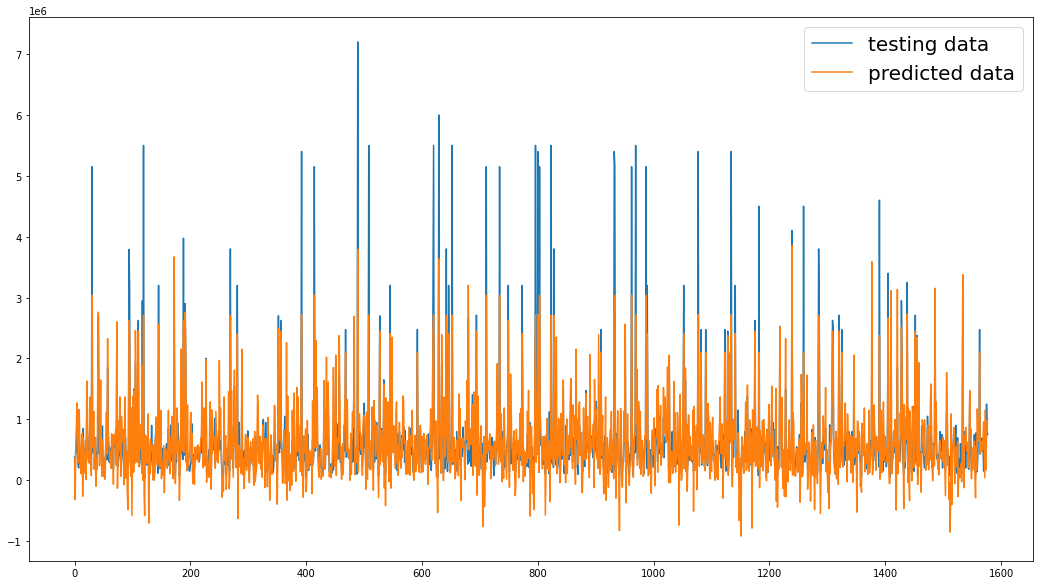

In [50]:
plt.figure(figsize=(18,10))

plt.plot(y_test, label="testing data")
plt.plot(y_pred, label="predicted data")


plt.legend(prop={"size":20})
plt.show()

In [51]:
# Calculate mean squared error of predicted values
mse_2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error : ", mse_2)
# Calculate absolute squared error of predicted values
mae_2 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae_2)
# Calculate root mean squared error
rms_2 = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", rms_2)
# Calculate the R_2 score
r2_2 = r2_score(y_test, y_pred)
print("R_2 Score : ", r2_2)

Mean Squared Error :  218941052035.0697
Mean Absolute Error :  278051.9087452472
Root Mean Squared Error :  467911.37198733445
R_2 Score :  0.6634910823594654


In [52]:
############    2nd FEATURE SET FINISHED     ############

In [53]:
############    3rd FEATURE SET START     ############
##x = df.loc[:,['max_power_bhp', 'age', 'km_driven', 'mileage_kmpl', 'max_power_bhp', 'transmission_Automatic', 'transmission_Manual']].values
x = df.loc[:,['max_power_bhp', 'mileage_kmpl', 'age', 'km_driven', 'transmission_Automatic', 'transmission_Manual', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol']].values
y = df.loc[:,['selling_price']].values

# Split the data to training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 147)

# Print the number of instances in training & test set
print(x_train.shape)
print(x_test.shape)
x_test

(6311, 10)
(1578, 10)


array([[ 70.  ,  24.  ,   4.  , ...,   1.  ,   0.  ,   0.  ],
       [ 46.3 ,  19.7 ,  13.  , ...,   0.  ,   0.  ,   1.  ],
       [ 73.97,  24.  ,   2.  , ...,   1.  ,   0.  ,   0.  ],
       ...,
       [100.6 ,  12.99,   5.  , ...,   1.  ,   0.  ,   0.  ],
       [108.5 ,  19.01,   4.  , ...,   1.  ,   0.  ,   0.  ],
       [120.  ,  11.  ,   4.  , ...,   1.  ,   0.  ,   0.  ]])

In [54]:
# Initialize min-max scaler and transform each feature by using min-max scaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_train

array([[0.03676471, 0.32424242, 0.30769231, ..., 0.        , 0.        ,
        1.        ],
       [0.23747277, 0.04545455, 0.46153846, ..., 1.        , 0.        ,
        0.        ],
       [0.09327342, 0.4530303 , 0.11538462, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.17728758, 0.5030303 , 0.11538462, ..., 1.        , 0.        ,
        0.        ],
       [0.09068627, 0.3030303 , 0.38461538, ..., 0.        , 0.        ,
        1.        ],
       [0.23747277, 0.09242424, 0.30769231, ..., 1.        , 0.        ,
        0.        ]])

In [55]:
#Linear Regression model begin
model = LinearRegression()

# Fit the training data to the model
model.fit(x_train, y_train)
model.coef_

array([[ 5.20518649e+06,  5.29451503e+05, -8.69914314e+05,
        -2.62530008e+06, -1.02908778e+19, -1.02908778e+19,
         3.43921770e+18,  3.43921770e+18,  3.43921770e+18,
         3.43921770e+18]])

In [56]:
# Print the general formula of our linear regression model
_str_3 = "y = "
for i, m in enumerate(model.coef_):
    _str_3 += "x_{}*{}+".format(i+1, m)
_str_3 += str(model.intercept_)
print(_str_3)

y = x_1*[ 5.20518649e+06  5.29451503e+05 -8.69914314e+05 -2.62530008e+06
 -1.02908778e+19 -1.02908778e+19  3.43921770e+18  3.43921770e+18
  3.43921770e+18  3.43921770e+18]+[6.85166013e+18]


In [57]:
# Scale each feature to range(0, 1)
x_test = scaler.transform(x_test)
x_test

array([[0.10130719, 0.45454545, 0.15384615, ..., 1.        , 0.        ,
        0.        ],
       [0.03676471, 0.32424242, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.11211874, 0.45454545, 0.07692308, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.18464052, 0.12090909, 0.19230769, ..., 1.        , 0.        ,
        0.        ],
       [0.20615468, 0.30333333, 0.15384615, ..., 1.        , 0.        ,
        0.        ],
       [0.23747277, 0.06060606, 0.15384615, ..., 1.        , 0.        ,
        0.        ]])

In [58]:
y_pred = model.predict(x_test)
# Print the predicted and the actual value of the 100th row in test set
"Predicted: {}, Actual: {}".format(y_pred[100], y_test[100])

'Predicted: [428032.], Actual: [425000]'

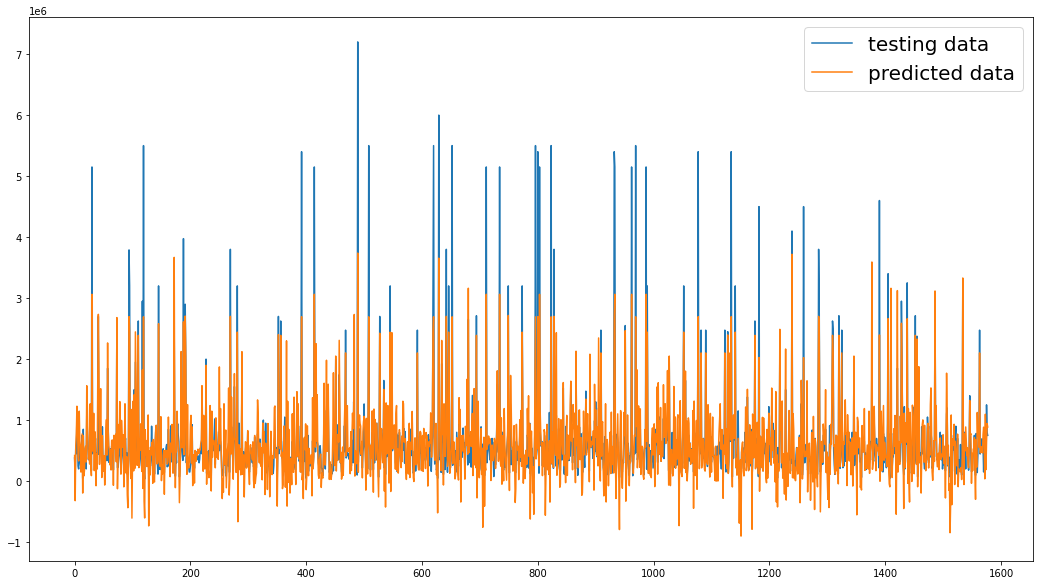

In [59]:
plt.figure(figsize=(18,10))

plt.plot(y_test, label="testing data")
plt.plot(y_pred, label="predicted data")


plt.legend(prop={"size":20})
plt.show()

In [60]:
# Calculate mean squared error of predicted values
mse_3 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error : ", mse_3)
# Calculate absolute squared error of predicted values
mae_3 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae_3)
# Calculate root mean squared error
rms_3 = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", rms_3)
# Calculate the R_2 score
r2_3 = r2_score(y_test, y_pred)
print("R_2 Score : ", r2_3) 

Mean Squared Error :  214637609919.09506
Mean Absolute Error :  268683.21039290243
Root Mean Squared Error :  463289.9846954336
R_2 Score :  0.6701054045028676
